# **Advanced Digital Signal Processing (ADSP) Lab - Python Lab Manual**
> **Course Code:** EEE G613 \
**Instructer in Charge:** Dr. Rajesh Kumar Tripathy \
**Teaching Assistant:** Shaswati Dash\
**Lab Technician:** Ramesh Pokanati





**********************************************
**********************************************

# **Experiment No. - 10**

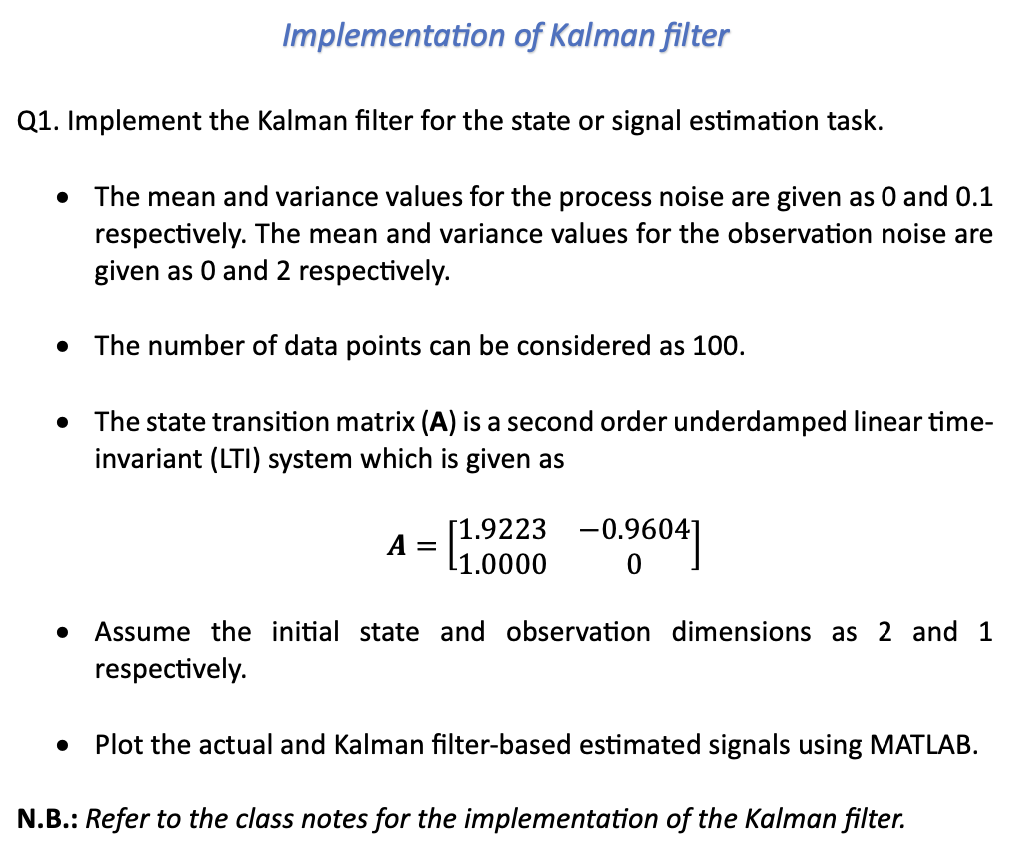

# *Python Code-*

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
StateDim = 2
ObsDim = 1
A = np.array([[1.9223, -0.9604], [1.0000, 0]])
C = np.zeros((ObsDim, StateDim))
C[:, 0] = 1
N = 100
x = np.zeros((StateDim, N))
y = np.zeros((ObsDim, N))

# Generate Process Noise
Var_PNoise = 0.1
Mu_PNoise = 0
Std_PNoise = np.sqrt(Var_PNoise)
PNoise = Std_PNoise * np.random.randn(StateDim, N) + Mu_PNoise * np.ones((StateDim, N))
Q = np.cov(PNoise)

# Generate Observation Noise
Var_ONoise = 2
Mu_ONoise = 0
Std_ONoise = np.sqrt(Var_ONoise)
ONoise = Std_ONoise * np.random.randn(ObsDim, N) + Mu_ONoise * np.ones((ObsDim, N))
R = np.cov(ONoise)

# Initialization
x[:, 0] = np.array([1, 0])
y[0] = np.dot(C, x[:, 0]) + ONoise[0]

# Simulate for State and Observation
for i in range(1, N):
    x[:, i] = np.dot(A, x[:, i - 1]) + PNoise[:, i]
    y[:, i] = np.dot(C, x[:, i]) + ONoise[:, i]

# Kalman Filtering
xh = np.zeros((StateDim, N + 1))
Px = np.eye(StateDim)
xh[:, 0] = 0.01 * np.random.randn(StateDim)
xh_ = np.zeros((StateDim, N))
yh_ = np.zeros((ObsDim, N))
inov = np.zeros((ObsDim, N))

for i in range(N):
    xh_[:, i] = np.dot(A, xh[:, i])
    Px_ = np.dot(np.dot(A, Px), A.T) + Q
    K = np.dot(np.dot(Px_, C.T), np.linalg.inv(np.dot(np.dot(C, Px_), C.T) + R))
    yh_[:, i] = np.dot(C, xh_[:, i])
    inov[:, i] = y[:, i] - yh_[:, i]
    xh[:, i + 1] = xh_[:, i] + np.dot(K, inov[:, i])
    Px = Px_ - np.dot(np.dot(K, C), Px_)

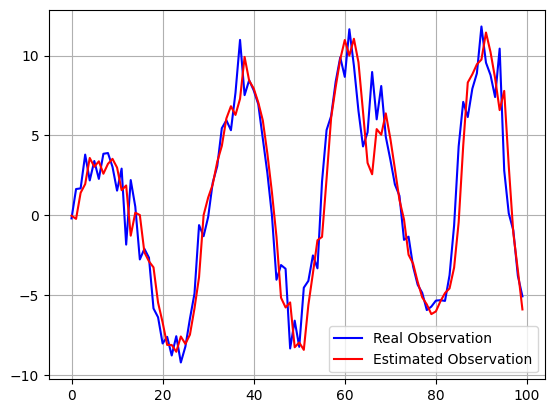

In [3]:
# Plotting Actual and Estimated Signals
plt.figure()
plt.plot(y[0], 'b', label='Real Observation')
plt.plot(yh_[0], 'r', label='Estimated Observation')
plt.grid(True)
plt.legend()
plt.show()